# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

### Project Overview
In this project I will explore the data provided by Starbucks. This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app.

The data is contained in three files:
- portfolio.json — containing offer ids and meta data about each offer (duration, type, etc.)
- profile.json — demographic data for each customer
- transcript.json — records for transactions, offers received, offers viewed, and offers completed.


### Problem Statement

The goal is to build a machine learning model that predicts how Starbucks  customer will respond to an offer based on demographics and offer type.

Using the data provided, I will answer the above question using charts for (Demographic data for each customer) and then by using 3 classification supervised machine learning models, feeding in the data from three combine data (portfolio, profile, transactional).

### Metrics
In order to evaluate my models performance , I will use accuracy. This Metric was chosen since it show how well a model is predicting by comparing the number of correct predictions witht the total number of predictions.

##### The goal is to build a machine learning model that predicts how Starbucks  customer will respond to an offer based on demographics and offer type

###  Data Understanding

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
base_color = sns.color_palette()[0]

In [263]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [250]:
profile = pd.read_json('profile.json', orient='records', lines=True)

In [366]:
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [3]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [5]:
 transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [6]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [173]:
profile.id.nunique()

17000

In [7]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [172]:
transcript.person.nunique()

17000

In [8]:
# check NaNs
profile.isna().sum(axis=0)

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [9]:
profile[profile['age'] == 118]

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN
10,118,20170824,None,c4863c7985cf408faee930f111475da3,NaN
11,118,20150919,None,148adfcaa27d485b82f323aaaad036bd,NaN
17,118,20170801,None,744d603ef08c4f33af5a61c8c7628d1c,NaN
23,118,20170907,None,2b826eba31074a059d63b0ae8f50b7d5,NaN


In [10]:
profile.shape

(17000, 5)

While working through the data I notices that there is age number 118 which seems outlier and I also checked that for all profiles that have age equal to 118, they also don't have gender listed. For those values I will drop all columns that have age number 118.

###  Data Wrangling

In [213]:
def clean_portfolio(portfolio):
    
    # rename customer id column..
    portfolio.rename(columns = {"id": "offer_id"}, inplace = True)
    
    #change channels column as a dummy column..
    #for i in ['web', 'email', 'mobile', 'social']:
        #portfolio[i] = portfolio.channels.apply(lambda val: 1 if  i in val else 0)
    
    # change offer_type column as a dummy column..
    #portfolio[['bogo', 'discount', 'informational']]= pd.get_dummies(portfolio.offer_type)
    
    #change duration from days to hours..
    portfolio.duration = portfolio.duration*24
    
    # drop channels and offer_type columns..
    #portfolio.drop(['channels'], axis = 1, inplace = True)
    #portfolio = portfolio[portfolio.offer_type != 'informational']
    
    return portfolio

In [214]:
portfolio = clean_portfolio(portfolio)

In [215]:
portfolio.head()

,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,168,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,120,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,96,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [264]:
def clean_profile(profile):
    # rename customer id column..
    profile.rename(columns = {"id": "customer_id"}, inplace = True)
    
    
    
    # transform the became_member_on column to a datetime object..
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d').dt.year
    
    
    # converte F to 0 and M to 1 in gender column..
    #profile['gender'] = profile['gender'].map({'F': '0', 'M':'1', 'O': '2'})
    
    
    # change offer_type column as a dummy column..
    #profile = pd.get_dummies(profile, columns=['became_member_on'], prefix = '', prefix_sep='')
    # Drop null values in gender and income columns..
    profile.dropna(subset=['gender', 'income'], inplace = True)
    profile.drop(profile[profile.age == 118].index, inplace = True)
    
    return profile

In [265]:
profile = clean_profile(profile)

In [16]:
profile.head()

,age,became_member_on,gender,customer_id,income
1,55,2017,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,2017,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,2018,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,2018,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,2017,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


In [255]:
profile.isnull().sum()

age                 0
became_member_on    0
gender              0
customer_id         0
income              0
dtype: int64

In [256]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
customer_id         14825 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [135]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [367]:
transcript = transcript.loc[(transcript['event'] == 'offer completed') | (transcript['event'] == 'transaction')]

In [368]:
def clean_transcript(transcript):
    
    # rename customer id column..
    transcript.rename(columns = {"person": "customer_id"}, inplace = True)
    
    
    
   #Create separate columns for amount, reward and offer_id from value column.

    
    transcript['offer_id'] = ''
    transcript['amount'] = 0
    transcript['reward'] = 0
    #Iterate over value column, check it and update offer_id, amount, reward columns
    for index, row in transcript.iterrows():
        for i in row['value']:
            if i == 'offer_id' or i == 'offer id':
                transcript.at[index, 'offer_id']= row['value'][i]
            if i == 'amount':
                transcript.at[index, 'amount']= row['value'][i]
            if i == 'reward':
                transcript.at[index, 'reward']= row['value'][i]
    # map offer type to offer id           
    offers_map = {
        'fafdcd668e3743c1bb461111dcafc2a4' : 'discount',
        '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'discount',
        '2298d6c36e964ae4a3e7e9706d1fb8c2':'discount',
        '2906b810c7d4411798c6938adc9daaa5':'discount',
        'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo',
        '4d5c57ea9a6940dd891ad53e9dbe8da0':'bogo',
        '9b98b8c7a33c4b65b9aebfe6a799e6d9':'bogo',
        'f19421c1d4aa40978ebb69ca19b0e20d':'bogo',
        '3f207df678b143eea3cee63160fa8bed':'informational',
        '5a8bc65990b245e5a138643cd4eb9837':'informational',
        
        
        
    }
    
    #create offer_type column 
    transcript['offer_type'] = transcript['offer_id'].map(offers_map)
    # Drop value column
    transcript.drop('value', axis = 1, inplace = True)
    
    
    return transcript

In [369]:
# update transcript datafram
transcript = clean_transcript(transcript)

In [370]:
# encode event and offer type columns
transcript = pd.get_dummies(transcript, columns=['event'], prefix = '', prefix_sep='')
transcript= pd.get_dummies(transcript, columns = ['offer_type'], prefix = '', prefix_sep='')

In [371]:
# sum all custumer's numeric data
transcript = transcript.groupby('customer_id').sum().reset_index()

In [372]:
# Drop transaction column
transcript =  transcript.drop('transaction', axis = 1)

In [373]:
transcript.head()

,customer_id,time,amount,reward,offer completed,bogo,discount
0,0009655768c64bdeb2e877511632db8f,5862,125,9,3,1,2
1,00116118485d4dfda04fdbaba9a87b5c,1224,3,0,0,0,0
2,0011e0d4e6b944f998e987f904e8c1e5,3660,77,13,3,1,2
3,0020c2b971eb4e9188eac86d93036a77,3864,193,14,3,1,2
4,0020ccbbb6d84e358d3414a3ff76cffd,5700,148,13,3,2,1


In [374]:
transcript.duplicated('customer_id').sum()

0

In [375]:
df = pd.merge(  transcript, profile,  on = 'customer_id', how = 'right')

In [276]:
df.customer_id.nunique()

14825

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 11 columns):
customer_id         14825 non-null object
time                14492 non-null float64
amount              14492 non-null float64
reward              14492 non-null float64
offer completed     14492 non-null float64
bogo                14492 non-null float64
discount            14492 non-null float64
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
income              14825 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 1.4+ MB


In [26]:
#check amount total number
df.amount.sum()

1707435

In [27]:
#check reward total number
df.reward.sum()

164676

In [278]:
df.isnull().sum()

customer_id           0
time                333
amount              333
reward              333
offer completed     333
bogo                333
discount            333
age                   0
became_member_on      0
gender                0
income                0
dtype: int64

In [279]:
# fill null value with 0
df.fillna(0, inplace = True)

In [280]:
df.isnull().sum()

customer_id         0
time                0
amount              0
reward              0
offer completed     0
bogo                0
discount            0
age                 0
became_member_on    0
gender              0
income              0
dtype: int64

In [376]:
df.head()

,customer_id,time,amount,reward,offer completed,bogo,discount,age,became_member_on,gender,income
0,0009655768c64bdeb2e877511632db8f,5862.0,125.0,9.0,3.0,1.0,2.0,33,2017,M,72000.0
1,0011e0d4e6b944f998e987f904e8c1e5,3660.0,77.0,13.0,3.0,1.0,2.0,40,2018,O,57000.0
2,0020c2b971eb4e9188eac86d93036a77,3864.0,193.0,14.0,3.0,1.0,2.0,59,2016,F,90000.0
3,0020ccbbb6d84e358d3414a3ff76cffd,5700.0,148.0,13.0,3.0,2.0,1.0,24,2016,F,60000.0
4,003d66b6608740288d6cc97a6903f4f0,9174.0,40.0,9.0,3.0,0.0,3.0,26,2017,F,73000.0


###  Analyzing Data

C:\Users\Aml\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aml\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Aml\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aml\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aml\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr

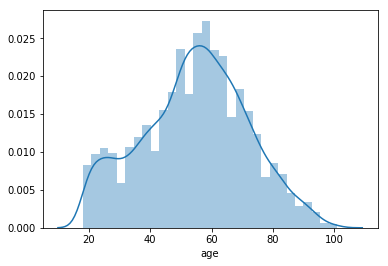

In [204]:
#check the customers' ages
sns.distplot(df.age,bins=30);

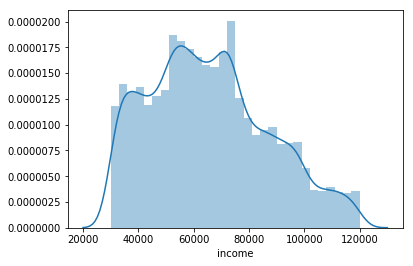

In [205]:
# check customer's income
sns.distplot(df.income,bins=30);

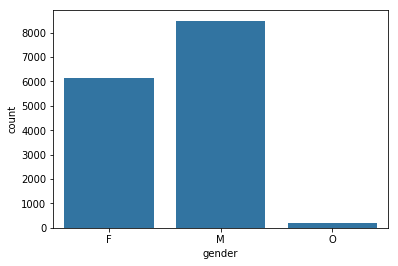

In [206]:
#check customer gender
sns.countplot(df.gender, color = base_color);

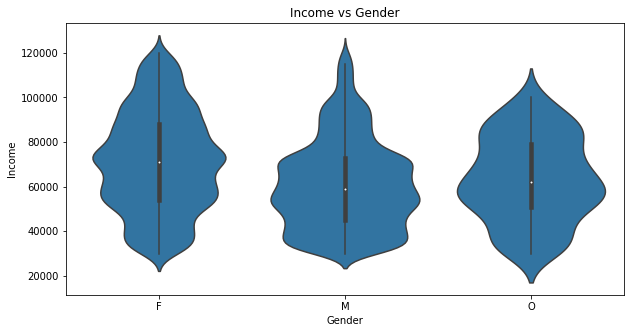

In [207]:
# check customer's income vs gender
plt.figure(figsize=(10, 5))
sns.violinplot(df['gender'],df['income'], color = base_color)
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.show();

In [40]:
df['offer_type'].value_counts()

bogo             63834
discount         62311
informational    22660
Name: offer_type, dtype: int64

###  Modling Data

In [209]:
df = df[['time', 'offer completed', 'amount', 'reward','age' , 'gender' , 'income']]

In [45]:
df.isnull().sum()

customer_id    0
event          0
time           0
offer_type     0
amount         0
reward         0
age            0
gender         0
income         0
dtype: int64

In [355]:
# encode gendr column
df['gender'] = df['gender'].map({'F': 1, 'M': 2, 'O': 3})

In [356]:
print(gender_map, '\n')

{'gender': {'M': 1, 'F': 2, 'O': 3}} 



In [332]:
#drop rows with null value
df.dropna(axis = 0, how = 'any', inplace = True)

##### split the data

In [333]:
X = df[['time', 'amount', 'reward', 'age', 'gender', 'income']]
y = df['offer completed']

In [334]:
X.head()

,time,amount,reward,age,gender,income
0,5862.0,125.0,9.0,33,1,72000.0
1,3660.0,77.0,13.0,40,3,57000.0
2,3864.0,193.0,14.0,59,2,90000.0
3,5700.0,148.0,13.0,24,2,60000.0
4,9174.0,40.0,9.0,26,2,73000.0


In [335]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_normalize = ['time', 'amount', 'reward', 'age', 'gender', 'income']

X[to_normalize] = scaler.fit_transform(X[to_normalize])
X.head()

C:\Users\Aml\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Aml\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aml\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,time,amount,reward,age,gender,income
0,0.347811,0.077833,0.163636,0.180723,0.0,0.466667
1,0.217159,0.047945,0.236364,0.265060,1.0,0.300000
2,0.229263,0.120174,0.254545,0.493976,0.5,0.666667
3,0.338199,0.092154,0.236364,0.072289,0.5,0.333333
4,0.544322,0.024907,0.163636,0.096386,0.5,0.477778


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [337]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (11118, 6)
Training Labels Shape: (11118,)
Testing Features Shape: (3707, 6)
Testing Labels Shape: (3707,)


### 1)  GaussianNB Model

In [338]:
gn_model = GaussianNB()
gn_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [339]:
gn_pred = gn_model.predict(X_test)

In [382]:
print('Gaussian Naive Bayes Classifier F1 Score {}'.format(gn_model.score(X_train, y_train)))
print('Gaussian Naive Bayes Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, gn_pred)))

Gaussian Naive Bayes Classifier F1 Score 0.6182766684655514
Gaussian Naive Bayes Classifier Prediction Accuracy 0.6145130833558133


### 2) Decision Tree Classifier

In [341]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [342]:
dt_pred = dt.predict(X_test)

In [343]:
print('DecisionTreeClassifier F1 Score {}'.format(dt.score(X_train, y_train)))
print('DecisionTreeClassifier Predition Accuracy {}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier F1 Score 1.0
DecisionTreeClassifier Predition Accuracy 0.6738602643647154


### 3) Support Vector Machine

In [344]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)


C:\Users\Aml\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [345]:
svm_pred = dt.predict(X_test)

In [381]:
print('SVM F1 Score {}'.format(svm.score(X_train, y_train)))
print('SVM Prediction Accuracy {}'.format(accuracy_score(y_test, svm_pred)))

SVM F1 Score 0.6257420399352401
SVM Prediction Accuracy 0.6738602643647154


### 4) LogisticRegression

In [347]:
from sklearn.linear_model import LogisticRegression

lorg = LogisticRegression()
lorg.fit(X_train, y_train)


C:\Users\Aml\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aml\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [348]:
lorg_pred = lorg.predict(X_test)

In [349]:
print('AdaBoost Classifier F1 Score{}'.format(lorg.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, lorg_pred)))

AdaBoost Classifier F1 Score0.577711818672423
AdaBoost Classifier Prediction Accuracy 0.5775559751820879


### Discussion:


Based on the above results , we can see that we scored 67% accuracy in the  testing dataset on Decision Tree Classifier. It is good here because we have binary target variable.

### Model Improvement

In [354]:
from sklearn.model_selection import GridSearchCV
#Initialize the classifier
clf = DecisionTreeClassifier()

# Create the parameters list to tune.

parameters =  {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}



# Perform grid search on the classifier  using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

C:\Users\Aml\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6701

Optimized Model
------
Final accuracy score on the testing data: 0.7227


It does look like an improvement make good impact, and I think it doesn't need further imporvements

### Conclusion:
In this project, I tried to analyze and make a model to predict how the Starbucks customer will respond to the offers. First I explored the data and made some changes before start the analysis. Then I did an exploratory analysis on the data after cleaning. Finally, I used 4 classification supervised machine learning models, feeding in the data from three combine data. The  Decision Tree Classifier had the best prediction accuracy score, that made me chose it to make some improvements and get 72% accuracy score . In conclusion, the company should focus to give more interesting offers to females since they are more interested in offers and Discount and BOGO increase the customer buy rating.

### Reflection:
I enjoyed working on this project which allowed me to work on the real-world project. The hardest part was deciding on the problem statement. 
The wrangling step was the longest and most challanging part.

### Improvement:
We can make a model that predicts which demographic groups will make purchases even if they don't receive an offer.